<h1 align="center"><strong>Transformada discreta de cosenos</strong></h1>

**1.¿Qué es la transformada discreta de cosenos?**

La transformada discreta de cosenos(DCT) permiten representar una señal original como una sumatoria de funciones base basadas en coseno, a diferencia de la transformada de Fourier esta transformada no presentan numeros complejos sino solo reales.

**2.¿Para qué sirve la transformada discreta de cosenos?**

Su mayor uso es el caso de la comprensión de imágenes (JPEG).

# Funciones base

In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from math import cos,sin,sqrt,pi
import pywt
from fractions import Fraction
os.chdir(r"C:\Users\titos\Github\Procesamiento Imagenes\Cap05_Mejoramiento_Frecuencia\imagenes")

In [2]:
def dct(x, y, u, v, n):
    # Coeficientes
    def alpha(a):
        if a==0:
            return sqrt(1.0/n)
        else:
            return sqrt(2.0/n)
    return alpha(u) * alpha(v) * cos(((2*x+1)*(u*pi))/(2*n)) * cos(((2*y+1)*(v*pi))/(2*n))

def getBasisImage(u, v, n):
    # Para cada (u,v) existe una funcion base DCT
    basisImg = np.zeros((n,n))
    for y in range(0, n):
        for x in range(0, n):
            basisImg[y,x] = dct(x, y, u, v, n)
    return basisImg

In [3]:
print("Generating DCT basis images")
n = 8
imageSet = [] # contiene todo el banco de funciones base
for v in range(0, n):
    for u in range(0, n):
        basisImg = getBasisImage(u, v, n)
        imageSet.append(basisImg)

Generating DCT basis images


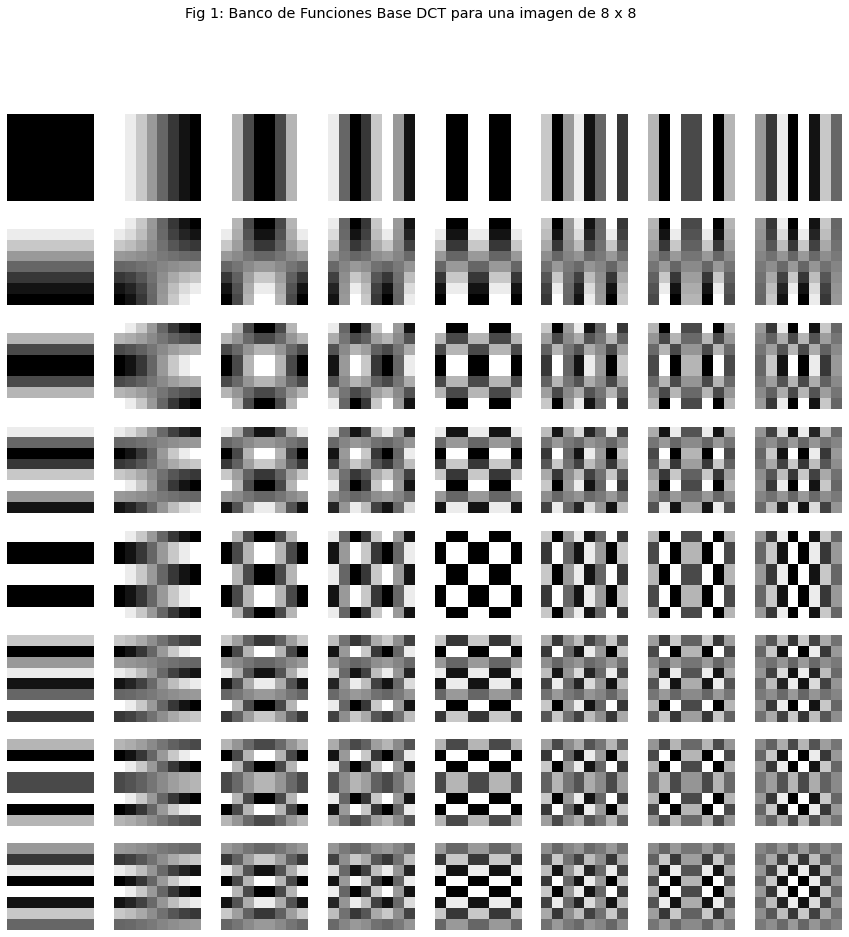

In [4]:
# Plot
fig = plt.figure(1,figsize=(15,15))
st = fig.suptitle(f"Fig 1: Banco de Funciones Base DCT para una imagen de {n} x {n}".format(n,n), fontsize="x-large")

for i in range(0, len(imageSet)):
    plt.subplot(n, n, i+1)
    plt.axis('off')
    plt.imshow(imageSet[i],cmap = 'gray')
plt.show()

1. Cualquier imagen de tamaño 8 x 8 va a tener estas funciones base , solo faltaría hallar los coeficientes que multiplican a estas funciones base para tener la DCT. La salida de aplicar la DCT a alguna señal son dichos coeficientes.

2. Si se tiene imagenes de 8 x 8 pixeles cada funcion base de la DCT sería de 8 x 8 pixeles. Una sola imagen de 8 x 8 pixeles tiene 8 x 8 funciones base.

# Ejemplos

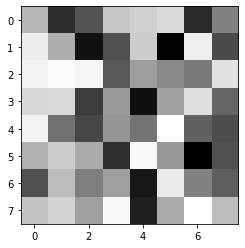

In [5]:
# Ejemplo 1: Imagen sintética
np.random.seed(1234)
ex_dct = np.random.randint(n**4, size = (n,n))
ex_dct = np.array(ex_dct,np.float32)
plt.imshow(ex_dct,cmap='gray')
plt.show()

In [6]:
# Match de la imagen original con cada uno de las funciones base
def coeficientes(image,imageSet,n):
    coef = []
    contenedor = np.zeros((n**2,1))
    for i in range(n**2):
        e = np.multiply(imageSet[i],image)
        e = np.mean(e)
        contenedor[i,:] = e
    contenedor = contenedor.reshape((n,n))
    return contenedor

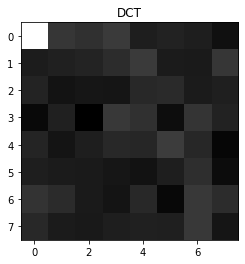

In [7]:
# Coeficientes de la transformada
coef =  coeficientes(ex_dct,imageSet,n)
plt.figure(1,figsize=(4,4))
plt.title("DCT")
plt.imshow(coef,cmap='gray')
plt.show()

Dimensiones de DCT : (512, 512)


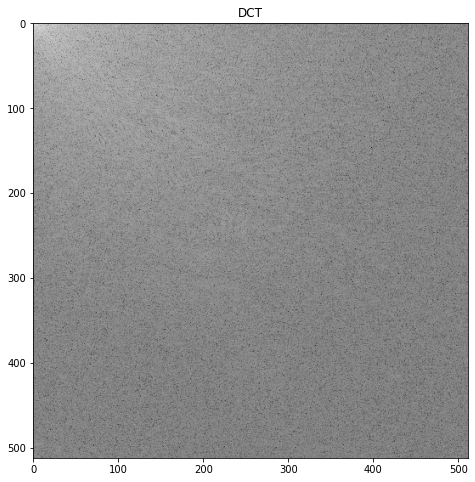

In [8]:
# Usando OpenCV
lenna = cv2.imread("Lenna.png")
lenna = cv2.cvtColor(lenna,cv2.COLOR_BGR2GRAY)

h = lenna.shape[0]
w = lenna.shape[1]

Trans = np.zeros((h,w), np.float32) # Imagen transformada (32,32)
Trans[:h,:w] = lenna

# DCT
dct = cv2.dct(Trans)
print("Dimensiones de DCT :", dct.shape)

# Plot
plt.figure(1,figsize=(8,8))
plt.title("DCT")
plt.imshow(np.log(np.abs(dct)),cmap='gray')
plt.show()

Los valores altos de DCT se encuentran en la esquina superior izquierda , esto quiere decir que las frecuencias bajas están más presentes en la imagen, mientras que las frecuencias altas que se encuentran en la esquina inferior derecha están menos presentes en la imagen.

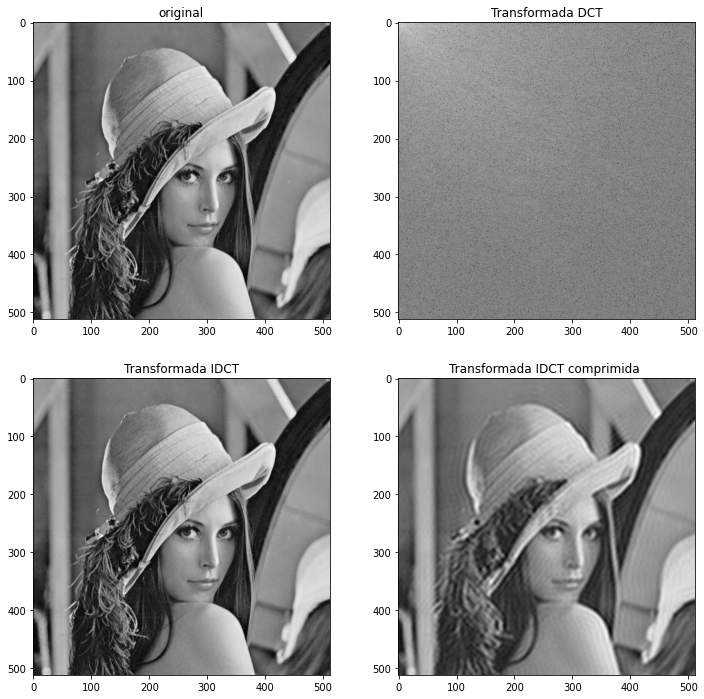

In [9]:
# Ejemplo 2: Comprensión de imágenes 
img1 = lenna.astype ('float') #Convertir uint8 a tipo flotante
 
img_dct = cv2.dct (img1) # Realizar transformada de coseno discreta
 
img_dct_log = np.log(abs(img_dct))#hacer procesamiento de registro
 
img_recor = cv2.idct(img_dct) # Realizar transformada coseno discreta inversa
 
 # Compresión de imagen, solo conserva 100 * 100 datos
recor_temp = img_dct[0:100,0:100]
recor_temp2 = np.zeros(lenna.shape)
recor_temp2[0:100,0:100] = recor_temp


# Recuperación de imágenes comprimidas
img_recor1 = cv2.idct(recor_temp2)
 
# Plot
plt.figure(1,figsize=(12,12))
plt.subplot(221)
plt.imshow(lenna,cmap='gray')
plt.title('original')
 
plt.subplot(222)
plt.imshow(img_dct_log,cmap='gray')
plt.title('Transformada DCT')
 
plt.subplot(223)
plt.imshow(img_recor,cmap='gray')
plt.title('Transformada IDCT')
 
plt.subplot(224)
plt.imshow(img_recor1,cmap='gray')
plt.title('Transformada IDCT comprimida ')
 
plt.show()